In [1]:
# imports

import os
from dotenv import load_dotenv
from huggingface_hub import login
from items import Item
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

In [2]:
# Log in to HuggingFace - if you get a "Note" about Environment variable being set, ignore it

hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
username = "kshitijchaudhary"
dataset = f"{username}/items_lite"

train, val, test = Item.from_hub(dataset)
items = train + val + test

print(f"Loaded {len(train):,} training items, {len(val):,} validation items, {len(test):,} test items")

Loaded 20,000 training items, 1,000 validation items, 1,000 test items


In [4]:
BASE_MODEL = "meta-llama/Llama-3.2-3B"

In [5]:
CUTOFF = 110

In [7]:
from transformers import AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

In [8]:
token_count = [item.count_tokens(tokenizer) for item in tqdm(items)]
print(len(token_count))

  0%|          | 0/22000 [00:00<?, ?it/s]

22000


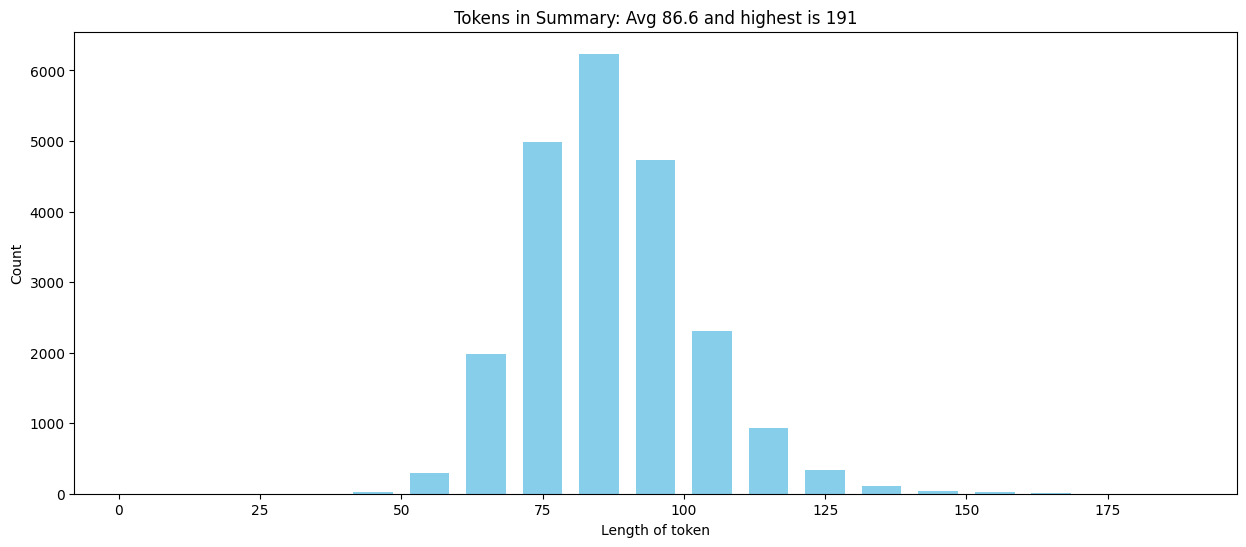

In [13]:
plt.figure(figsize=(15,6))
plt.title(f"Tokens in Summary: Avg {sum(token_count) / len(token_count):,.1f} and highest is {max(token_count)}")
plt.xlabel("Length of token")
plt.ylabel("Count")
plt.hist(token_count, rwidth=0.7, color="skyblue", bins=range(0, 200, 10))
plt.show()

In [9]:
cut = len([count for count in token_count if count > CUTOFF])
print(f"With this CUTOFF, we will truncate {cut:,} items which is {cut/len(token_count):,.1%} ")

With this CUTOFF, we will truncate 1,321 items which is 6.0% 


In [10]:
for item in tqdm(train+val):
    item.make_prompts(tokenizer, CUTOFF, True)
for item in tqdm(test):
    item.make_prompts(tokenizer, CUTOFF, False)

  0%|          | 0/21000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [16]:
print("PROMPT:")
print(items[0].prompt)
print("COMPLETION:")
print(items[0].completion)

PROMPT:
What does this cost to the nearest dollar?

Title: Schlage F59 Interior Knob – Oil Rubbed Bronze  
Category: Hardware  
Brand: Schlage  
Description: A precision‑engineered interior knob featuring an oil‑rubbed bronze finish for a stylish, secure lock set.  
Details: Includes a deadbolt, easy installation, and lifetime mechanical and finish warranty.

Price is $
COMPLETION:
64.00


In [18]:
prompt_token_counts = [item.count_prompt_tokens(tokenizer) for item in tqdm(items)]

  0%|          | 0/22000 [00:00<?, ?it/s]

In [20]:
len(prompt_token_counts)

22000

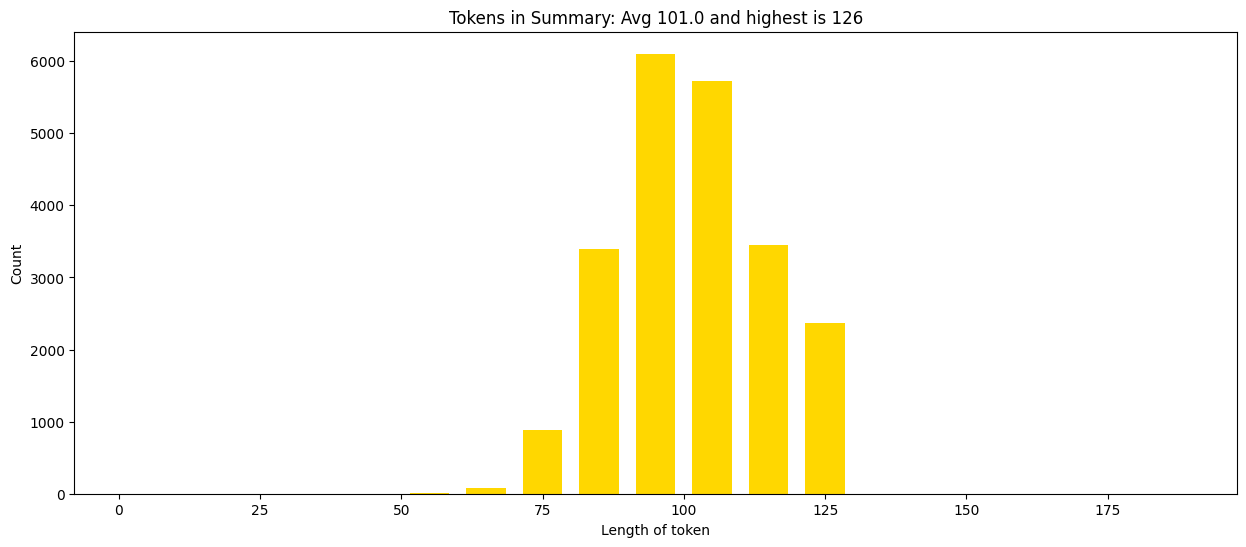

In [26]:
plt.figure(figsize=(15,6))
plt.title(f"Tokens in Summary: Avg {sum(prompt_token_counts) / len(prompt_token_counts):,.1f} and highest is {max(prompt_token_counts)}")
plt.xlabel("Length of token")
plt.ylabel("Count")
plt.hist(prompt_token_counts, rwidth=0.7, color="gold", bins=range(0, 200, 10))
plt.show()

# plt.figure(figsize=(15, 6))
# plt.title(f"Tokens: Avg {sum(prompt_token_counts)/len(prompt_token_counts):,.1f} and highest {max(prompt_token_counts):,}\n")
# plt.xlabel('Number of tokens in prompt and the completion')
# plt.ylabel('Count')
# plt.hist(prompt_token_counts, rwidth=0.7, color="gold", bins=range(0, 200, 10))
# plt.show()

In [27]:
username = "kshitijchaudhary"
dataset = f"{username}/items_prompts_lite"

Item.push_prompts_to_hub(dataset, train, val, test)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            